# **HVSS Machine Learning Lab (with test set)**

**Welcome to the HVSS AI/ML lab!**

This lab is designed to help you get started with AI/ML model creation and to provide you with a framework for building and imporving the various HVSS models.

***Notice: This lab includes a test step of the models' accuracy (MSE) using test sets, which are taken out of the training data. If you wish to train the models using the full data set (skipping the test step), please use  the 'HVSS Score Lab (full training data without test set).ipynb' file instead***

### **Import all common libraries**

First, we will import all the common libraries that we will use in this lab:

In [1]:
import pandas as pd
import warnings

# Suppress specific UserWarnings
warnings.filterwarnings("ignore", category=UserWarning, message="Data Validation extension is not supported and will be removed")
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

### **Loading the training data**

We are managing the training data in **`TrainingData.xlsx`**, which contains multiple sheets for each of the different training data sets (Exploitability, XCIA, XHB, XPS, XSD). We will use the `pandas` library to read the data from each sheet in the Excel file into a separate `DataFrame` object:

In [2]:
# Define an array of sheets
sheets = ['Exploitability', 'XCIA', 'XPS', 'XSD', 'XHB']

# Create a dictionary to hold the dataframes
dfs = {}

# Loop through the sheets and read its contents into a separate DataFrame.
# Omitting the header names as they are not needed
for sheet in sheets:
    df = pd.read_excel('TrainingData.xlsx', sheet_name=sheet, header=None, skiprows=1)
    
    # Drop rows containing at least one NaN value
    df_cleaned = df.dropna()
    
    dfs[sheet] = df_cleaned

Let's print out the Exploitability and XCIA training data to see what it looks like. It will show you the first and last 5 rows of the data for each sheet (without the original table header):

In [3]:
# Display the Exploitability DataFrame
print('Exploitability DataFrame:\n')
print(dfs['Exploitability'])

# Display the XCIA DataFrame
print('XCIA DataFrame:\n')
print(dfs['XCIA'])

Exploitability DataFrame:

     0  1  2  3    4
0    1  2  3  2  5.1
1    1  3  1  2  6.6
2    3  1  3  2  3.9
3    4  3  2  1  4.0
4    2  2  1  2  8.3
..  .. .. .. ..  ...
186  4  6  3  2  0.1
187  4  6  3  2  0.1
188  4  6  3  2  0.1
189  4  6  3  2  0.1
190  4  6  3  2  0.1

[191 rows x 5 columns]
XCIA DataFrame:

     0  1  2  3  4  5  6    7
0    1  2  3  2  3  3  3  7.5
1    1  3  1  2  2  1  1  1.3
2    3  1  3  2  3  3  2  3.7
3    4  3  2  1  3  2  2  3.9
4    2  2  1  2  1  2  1  1.6
..  .. .. .. .. .. .. ..  ...
186  4  6  3  2  1  3  1  0.2
187  4  6  3  2  3  1  1  0.2
188  4  6  3  2  1  3  3  0.3
189  4  6  3  2  1  3  1  0.2
190  4  6  3  2  1  2  1  0.1

[191 rows x 8 columns]


Open the Exploitability and XCIA sheets in the Excel file and compare the original data with the above. Data should be the same.

Now let's visualize the data for each training set to see the distribution of the data:

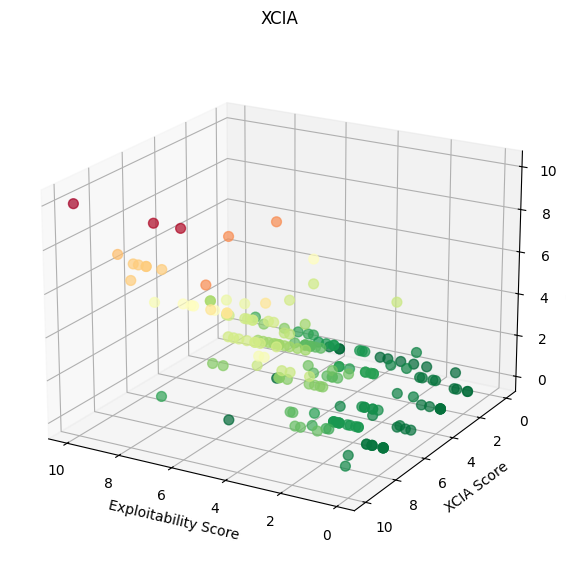

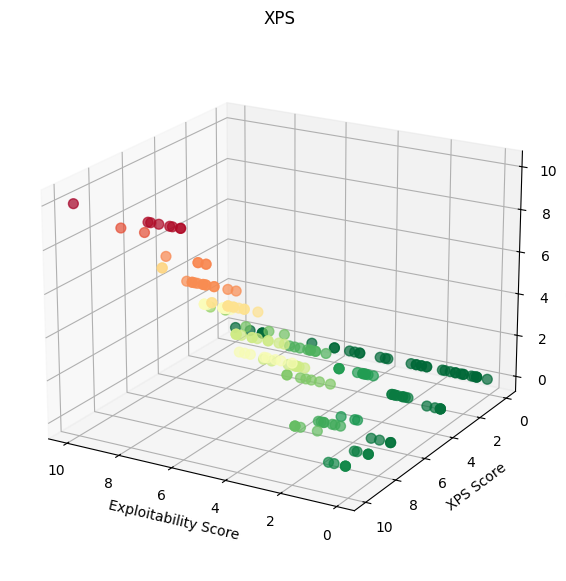

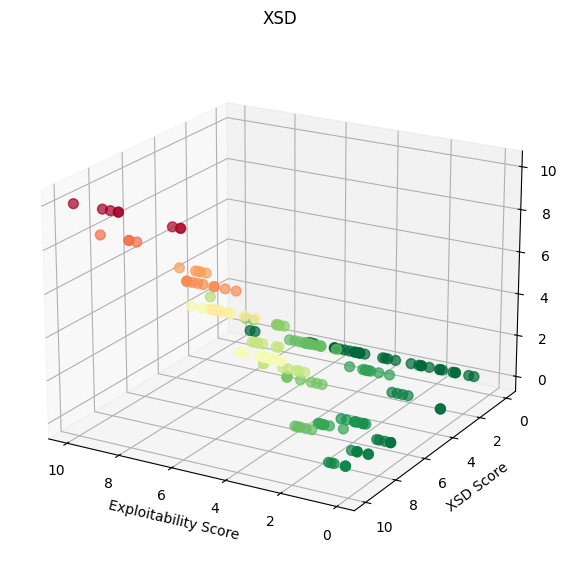

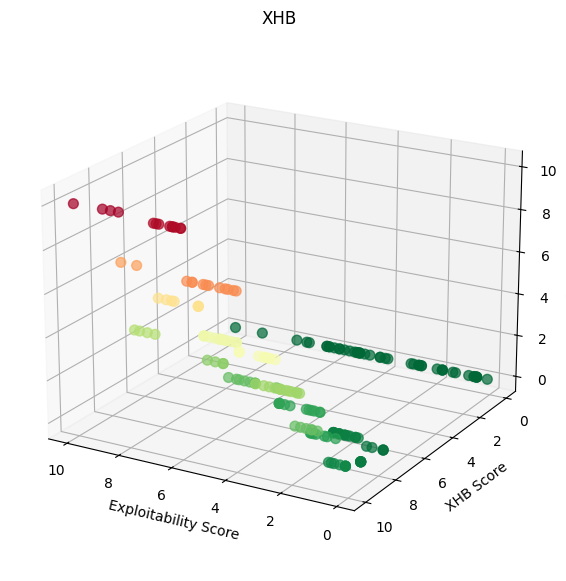

In [4]:
import matplotlib.pyplot as plt

# Load and clean the Input sheet for visualizations
input_data = pd.read_excel('TrainingData.xlsx', sheet_name='Input')

# Extract and clean the relevant columns using the correct names
exploitability_score = pd.to_numeric(input_data['Exploitability Score'], errors='coerce')
xcia_score = pd.to_numeric(input_data['XCIA Score'], errors='coerce')
xps_score = pd.to_numeric(input_data['XPS Score'], errors='coerce')
xsd_score = pd.to_numeric(input_data['XSD Score'], errors='coerce')
xhb_score = pd.to_numeric(input_data['XHB Score'], errors='coerce')

final_xcia = pd.to_numeric(input_data['Final XCIA'], errors='coerce')
final_xps = pd.to_numeric(input_data['Final XPS'], errors='coerce')
final_xsd = pd.to_numeric(input_data['Final XSD'], errors='coerce')
final_xhb = pd.to_numeric(input_data['Final XHB'], errors='coerce')

# Prepare a DataFrame for easy manipulation and plotting
plot_data = pd.DataFrame({
    'Exploitability Score': exploitability_score,
    'XCIA Score': xcia_score,
    'XPS Score': xps_score,
    'XSD Score': xsd_score,
    'XHB Score': xhb_score,
    'Final XCIA': final_xcia,
    'Final XPS': final_xps,
    'Final XSD': final_xsd,
    'Final XHB': final_xhb
})

# Define a colormap for the gradient from green to red
cmap = plt.get_cmap('RdYlGn_r')

# Plot 1: Exploitability Score vs XCIA Score (3D with gradient color mapping)
fig1 = plt.figure(figsize=(10, 7))
ax1 = fig1.add_subplot(111, projection='3d')

sc1 = ax1.scatter(
    plot_data['Exploitability Score'], 
    plot_data['XCIA Score'], 
    plot_data['Final XCIA'], 
    c=plot_data['Final XCIA'], 
    cmap=cmap,
    s=50,  
    alpha=0.7 
)

ax1.set_xlabel('Exploitability Score')
ax1.set_ylabel('XCIA Score')
ax1.set_zlabel('Final XCIA')
ax1.set_title('XCIA')
ax1.view_init(elev=20, azim=120)

plt.show()

# Plot 2: Exploitability Score vs XPS Score (3D with gradient color mapping)
fig2 = plt.figure(figsize=(10, 7))
ax2 = fig2.add_subplot(111, projection='3d')

sc2 = ax2.scatter(
    plot_data['Exploitability Score'], 
    plot_data['XPS Score'], 
    plot_data['Final XPS'], 
    c=plot_data['Final XPS'], 
    cmap=cmap,
    s=50,  
    alpha=0.7 
)

ax2.set_xlabel('Exploitability Score')
ax2.set_ylabel('XPS Score')
ax2.set_zlabel('Final XPS')
ax2.set_title('XPS')
ax2.view_init(elev=20, azim=120)

plt.show()

# Plot 3: Exploitability Score vs XSD Score (3D with gradient color mapping)
fig3 = plt.figure(figsize=(10, 7))
ax3 = fig3.add_subplot(111, projection='3d')

sc3 = ax3.scatter(
    plot_data['Exploitability Score'], 
    plot_data['XSD Score'], 
    plot_data['Final XSD'], 
    c=plot_data['Final XSD'], 
    cmap=cmap,
    s=50,  
    alpha=0.7 
)

ax3.set_xlabel('Exploitability Score')
ax3.set_ylabel('XSD Score')
ax3.set_zlabel('Final XSD')
ax3.set_title('XSD')
ax3.view_init(elev=20, azim=120)

plt.show()

# Plot 4: Exploitability Score vs XHB Score (3D with gradient color mapping)
fig4 = plt.figure(figsize=(10, 7))
ax4 = fig4.add_subplot(111, projection='3d')

sc4 = ax4.scatter(
    plot_data['Exploitability Score'], 
    plot_data['XHB Score'], 
    plot_data['Final XHB'], 
    c=plot_data['Final XHB'], 
    cmap=cmap,
    s=50,  
    alpha=0.7 
)

ax4.set_xlabel('Exploitability Score')
ax4.set_ylabel('XHB Score')
ax4.set_zlabel('Final XHB')
ax4.set_title('XHB')
ax4.view_init(elev=20, azim=120)

plt.show()

### **Preparing the training data**

In order to train the model using the training data we have just loaded, we need to prepare the data first so that it can be properly consumed by the algorithm for generating the models. We will use the `scikit-learn` library to do this. The `scikit-learn` library is a very popular machine learning library for Python. It provides a lot of useful functions for data preparation, model training, and model evaluation.

We need to split the training data into two parts: The input data, or "features" (marked by x) and the prediction data, or "target" (marked by ŷ - pronounced "y hat"). In our case, the features are the HVSS metrices values (e.g. XHB, XPS, XSD, etc.) and the target is the score.

In [5]:
# Create dictionaries to hold the features and target variables for each sheet
dfs_X = {}
dfs_Y = {}

# Loop through the sheets and split the features and target variables
for sheet in sheets:
    dfs_X[sheet] = dfs[sheet].iloc[:, :-1].values
    dfs_Y[sheet] = dfs[sheet].iloc[:, -1].values

Let's print the splitted XCIA data to see how it looks like:

In [6]:
# Display the XCIA feature values
print("XCIA feature values (X):\n")
print(dfs_X['XCIA'])
print("\n")

# Display the XCIA target value
print("XCIA target value (Y):\n")
print(dfs_Y['XCIA'])

XCIA feature values (X):

[[1 2 3 ... 3 3 3]
 [1 3 1 ... 2 1 1]
 [3 1 3 ... 3 3 2]
 ...
 [4 6 3 ... 1 3 3]
 [4 6 3 ... 1 3 1]
 [4 6 3 ... 1 2 1]]


XCIA target value (Y):

[ 7.5  1.3  3.7  3.9  1.6  0.2  1.9  0.2  3.9  6.7  1.9  3.9  1.9  3.5
  1.   0.   6.4  3.9  3.9  1.3  3.9  4.8  0.   0.   0.8  2.5  1.3  0.3
  0.3  1.9  1.5  6.4  0.   1.   2.9  0.3  0.   3.8  2.9  2.9  0.3  2.9
  1.2  5.   7.5  1.   1.9  2.5  5.   0.3  5.8  1.5  1.9  1.9  1.2  0.3
  2.   3.8  1.2  2.5  0.3  0.   0.8  1.   2.9  4.5  0.   1.2  2.5  1.9
  2.5  7.5  0.8  1.   5.   6.4  3.9  1.   1.2  3.8  0.   5.8  1.   1.2
  2.5  2.5  0.6  1.9  2.2  3.9  2.9  3.1  2.5  1.9  0.5  0.1  0.8  1.
  9.8  1.9  1.9  1.   3.9  0.3  1.   2.   2.9  2.9  0.6  3.8  1.3  2.5
  3.7  0.   5.8  1.   4.8  0.   2.9  6.4  1.2  9.8  1.   0.8  3.8  3.8
  5.   1.   4.8  1.9  1.2  3.7  1.   1.   2.9  1.9  4.5  3.7  3.9  3.5
  2.   1.5  0.3  1.9  2.5  3.8  1.   0.5  0.3  0.3  1.2  1.   0.2  0.6
  2.5  1.9  5.   3.7  0.8  0.3  6.4  2.5  0.6  0

Since we have a small-sized data set, we will rely on the `GridSearchCV` function (down below) to perform the validation for us. Therefore, we will not need to split the data into a validation set. However, we will still need to split the data into a training set and a test set. The test set will be used to evaluate the final models. We will use the `train_test_split` function again to split the data into a training set and a test set: 

* 90% training set
* 10% test set

In [7]:
from sklearn.model_selection import train_test_split

# Create dictionaries to hold the training and temporary sets for each sheet
dfs_X_train = {}
dfs_Y_train = {}
dfs_X_test = {}
dfs_Y_test = {}

# Loop through the sheets and split the data set into a training set and a test set using an 90-10 split
# The random state is set to 42 to ensure the same split is used for each sheet
for sheet in sheets:    
    dfs_X_train[sheet], dfs_X_test[sheet], dfs_Y_train[sheet], dfs_Y_test[sheet] = train_test_split(dfs_X[sheet], dfs_Y[sheet], test_size=0.1, random_state=42)


# Display the XCIA training sub set
print("XCIA training sub set:\n")
print(dfs_X_train['XCIA'])
print("\n")

# Display the XCIA test sub set value
print("XCIA test sub set:\n")
print(dfs_X_test['XCIA'])

XCIA training sub set:

[[3 5 3 ... 3 2 3]
 [4 5 1 ... 2 2 2]
 [4 1 3 ... 2 1 2]
 ...
 [3 3 2 ... 3 1 3]
 [3 4 2 ... 1 2 3]
 [1 2 3 ... 2 2 3]]


XCIA test sub set:

[[3 6 2 2 2 1 3]
 [2 2 1 2 1 3 3]
 [4 5 2 2 3 1 2]
 [2 6 3 1 1 1 1]
 [4 6 1 2 2 2 3]
 [1 1 3 1 1 3 3]
 [1 1 1 1 3 3 1]
 [2 1 1 1 3 3 1]
 [4 2 3 1 3 3 3]
 [3 2 1 2 2 1 3]
 [4 1 2 2 1 2 3]
 [2 3 1 1 3 1 3]
 [2 2 3 2 3 2 2]
 [2 1 2 2 2 1 2]
 [4 4 3 1 2 3 3]
 [4 6 3 2 3 3 3]
 [2 3 3 1 1 2 2]
 [2 2 2 2 1 2 3]
 [4 6 3 2 1 3 3]
 [3 3 3 2 1 2 2]]


### **Finding the best algorithm parameters**

Each AI/ML algorithm comes with a set of parameters that can be used to tune the algorithm (and effectively generate a more accurate model). For instance, in scikit-lean, the `MLPRegressor` (which is a neural network algorithm) has the following parameters:

* `hidden_layer_sizes`: A tuple that defines the number of hidden layers and the number of neurons in each layer
* `activation` :The activation function for the hidden layers
* `solver`: The solver for weight optimization
* `alpha`: The L2 penalty (regularization term) parameter
* `batch_size`: The size of minibatches for stochastic optimizers
* `learning_rate`: The learning rate schedule for weight updates
* `learning_rate_init`: The initial learning rate used
* `power_t`: The exponent for inverse scaling learning rate
* `max_iter`: The maximum number of iterations
* `shuffle`: Whether to shuffle samples in each iteration
* `random_state`: The random number generator
* `tol`: The tolerance for the optimization
* `verbose`: Whether to print progress messages
* `warm_start`: Whether to reuse the solution of the previous call to fit as initialization
* `momentum`: The momentum for gradient descent update
* `nesterovs_momentum`: Whether to use Nesterov’s momentum
* `early_stopping`: Whether to use early stopping to terminate training when validation score is not improving
* `validation_fraction`: The proportion of training data to set aside as validation set for early stopping
* `beta_1`: The exponential decay rate for estimates of first moment vector in adam
* `beta_2`: The exponential decay rate for estimates of second moment vector in adam
* `epsilon`: The value for numerical stability in adam
* `n_iter_no_change`: The maximum number of epochs to not meet tol improvement

The documentation for the `MLPRegressor` algorithm can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

As you can see, there are a lot of parameters that can be used to tune the algorithm. The question is, how do we know which parameters to use? The answer is, we don't. We need to try different combinations of parameters and see which one gives us the best result. This process is called "hyperparameter tuning". In this lab, we will use the `GridSearchCV` function from `scikit-learn` to perform hyperparameter tuning. The `GridSearchCV` function will try all the combinations of parameters that we specify and return the best combination. We will use the `GridSearchCV` function to find the best parameters for the `MLPRegressor` algorithm, for a subset of the optional parameters available.

The model will be trained with the best parameters found by the `GridSearchCV` function.

Notice that the `GridSearchCV` function will take few minutes to complete.

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

# Specify the hyperparameters and their values
param_grid = {
    # Single hidden layer is defined for the sake of simplicity. The value defines the # of neurons in the hidden layer.
    # In order to use a multi-hidden-layer networks, use a tuple of integers [for instance (50, 100, 50) defines a network with 3 hidden layers, with 50, 100 and 50 neurons in each layer]
    'hidden_layer_sizes': [(50,), (100,), (150,), (200,), (250,), (300,)], 
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive'],    
    'random_state': [42]  # setting the random state to a specific value ensures reproducibility
}

grid_search = {}

for sheet in sheets:

    # We'll use mean squared error as our scoring metric
    grid_search[sheet] = GridSearchCV(MLPRegressor(max_iter=25000), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

    # Train the model
    grid_search[sheet].fit(dfs_X_train[sheet], dfs_Y_train[sheet])

    # Print the best scores
    print(f"Best score for {sheet}: ", -grid_search[sheet].best_score_) # Negate to get the positive MSE value

    # Print the best parameters    
    print(f"Best parameters for {sheet}: ", grid_search[sheet].best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best score for Exploitability:  0.06326312083437036
Best parameters for Exploitability:  {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'random_state': 42, 'solver': 'lbfgs'}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best score for XCIA:  1.2219764897140197
Best parameters for XCIA:  {'activation': 'tanh', 'hidden_layer_sizes': (150,), 'learning_rate': 'adaptive', 'random_state': 42, 'solver': 'sgd'}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best score for XPS:  0.46759880584606056
Best parameters for XPS:  {'activation': 'relu', 'hidden_layer_sizes': (250,), 'learning_rate': 'constant', 'random_state': 42, 'solver': 'adam'}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best score for XSD:  0.3392592384106484
Best parameters for XSD:  {'activation': 'relu', 'hidden_layer_sizes': (300,), 'learning_rate': 'constant', 'random_state

Notice two parameters that we pass to the `GridSearchCV` function: `cv` and `n_jobs`.  

The `cv` parameter in `GridSearchCV` determines the number of folds to use in **k-fold cross-validation**. K-fold cross-validation is a technique used for assessing how well a machine learning model will generalize to an independent data set.

In k-fold cross-validation, the training data is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation.

The `n_jobs` defines how many CPU cores to use for the training. Setting the value to -1 will use all available CPU cores, dramatically shortening the overall time required for the training.

### **Evaluating the models accuracy**

Let's see how well the models perform on the test set. we will use the `mean_squared_error` function from scikit-learn to calculate the Mean Squared Error (MSE) between the actual score and the predicted score for the test set. The MSE is a measure of how close the predicted score is to the actual score. The lower the MSE, the more accurate the model is:

In [9]:
from sklearn.metrics import mean_squared_error

test_error = {}

for sheet in sheets:
    # Use the best estimator to make predictions on the test set
    Y_test_pred = grid_search[sheet].predict(dfs_X_test[sheet])

    # Calculate the test set error
    test_error[sheet] = mean_squared_error(dfs_Y_test[sheet], Y_test_pred)

    print(f"Test MSE for {sheet}: ", test_error[sheet])

Test MSE for Exploitability:  0.1402547843354127
Test MSE for XCIA:  1.679182038972528
Test MSE for XPS:  0.3414777031884639
Test MSE for XSD:  0.15602877927896255
Test MSE for XHB:  0.39179386258031823


### **Interpreting the test results**

As we are relying on the `GridSearchCV` function to validate the model for us, we will only need to jumpt straight to testing the model against the test set. If the test results are satisfactory, we can finalize the model and use it for production.

The values you'll see above is the MSE for the score prediction. For instance, if the MSE is 1.5, it means that the predicted score is off by 1.5 from the actual score (in average).

#### So to conclude: 

If the MSE is too high (and it's up to you to decide what is considered "too high"), it means that the model is not accurate enough. We can try to improve the model by:

* Adding more training data
* Improve the training data quality
* Modify the hyperparameters
* Adding more features
* Using a different algorithm

**This is where the iterative process of building and improving the model comes into play!**

### **Storing the model for future use**

The models that we've trained are currently stored in memory only.
We would like to persist the models in separate files, so that we'll be able to load those later in order to predict the score for new data.

For this task, we'll use the `dump` function of the popular `pickle` Python library:

In [10]:
import pickle

for sheet in sheets:
    
    with open(f'models\\{sheet.lower()}_model.pkl', 'wb') as f:
        pickle.dump(grid_search[sheet], f)

### **Final Notes**

We have now trained the models, evaluated their accuracy using test sets, and stored them in separate files. We can now use the models to predict the score for new data. In case you want to re-train the models, you can simply run the notebook again. The model files will be overwritten with the new models.